In [23]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
radii = [0, 90, 120]w

In [16]:
data_frames = []
for radius in radii:
    load_path = Path(str(radius))
    patient_c: pd.DataFrame = pd.read_csv(Path(load_path, "patient_c_metrics.csv"))
    patient_c["Patient"] = "Patient C"
    patient_c["Radius"] = radius
    data_frames.append(patient_c)
    
    patient_d = pd.read_csv(Path(load_path, "patient_d_metrics.csv"))
    patient_d["Patient"] = "Patient D"
    patient_d["Radius"] = radius
    data_frames.append(patient_d)


metrics = pd.concat(data_frames, axis=0)
metrics = metrics.drop(columns=["Unnamed: 0"])

In [17]:
metrics

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Patient,Radius
0,Extra Trees Classifier,0.4899,0.4941,0.4899,0.4949,0.3702,-0.0024,-0.0050,Patient C,0
0,Extra Trees Classifier,0.2548,0.4255,0.2548,0.5492,0.1276,-0.0069,-0.0380,Patient D,0
0,Extra Trees Classifier,0.4899,0.4969,0.4899,0.4946,0.3892,-0.0036,-0.0063,Patient C,90
0,Logistic Regression,0.2486,0.5470,0.2486,0.4510,0.1243,-0.0186,-0.0939,Patient D,90
0,Extra Trees Classifier,0.4898,0.4939,0.4898,0.4944,0.3963,-0.0042,-0.0069,Patient C,120
0,Logistic Regression,0.2480,0.5558,0.2480,0.4455,0.1181,-0.0147,-0.0849,Patient D,120


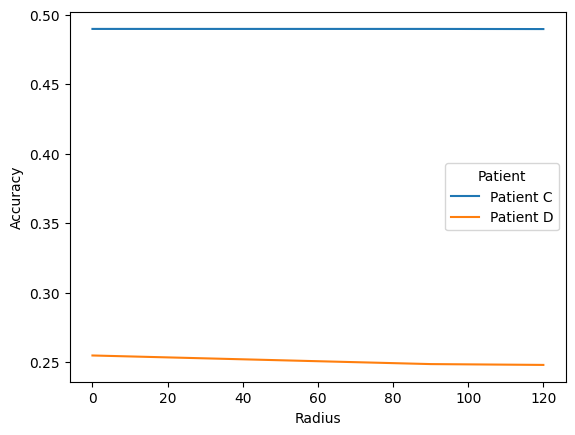

In [26]:
sns.lineplot(data=metrics, x="Radius", y="Accuracy", hue="Patient")
plt.savefig("accuracy_per_radius.png", dpi=300)